Pré-processamento realizado em Processing.ipynb

# Bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import ml_time_series as mls
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils

%matplotlib notebook

In [2]:
def Stacker(files_,t):
    
    #Lê dados do arquivo e remove janela
    Xc = np.load('DB_INTENC/preproc/'+files_[0]+'.npy')
    Xc = Xc[:-49]
    
    #Aplica Hstack nos dados
    for j in range(1,len(files_)):
        Xci = np.load('DB_INTENC/preproc/'+files_[j]+'.npy')
        Xc = np.hstack((Xc.reshape(Xc.shape),Xci.reshape(Xci.shape)))
        
    #Labeling the PKS level    
    #C = (np.ones(len(Xc))*l).reshape((len(Xc),1))
    #Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))    
    
    # Salving in file on the folder <DB_INTENC/preproc/labeled>
    np.save('./DB_INTENC/preproc/labeled/'+t+'_hs', Xc, allow_pickle=False)
    
    if "v" in t:
        DATAv_hs.append(t+'_hs.npy')
    else:
        DATA_hs.append(t+'_hs.npy')

In [3]:
#Carregando arquivos para treino e teste

files_ = [['p1_std', 'p1_rms', 'p1_filt'],['p2_std', 'p2_rms', 'p2_filt'],['p3_std', 'p3_rms', 'p3_filt'],
          ['p5_std', 'p5_rms', 'p5_filt'],['c1_std', 'c1_rms', 'c1_filt'],['c3_std', 'c3_rms', 'c3_filt'],
          ['p4_std', 'p4_rms', 'p4_filt'],['p6_std', 'p6_rms', 'p6_filt']]
DATA_hs = []

In [4]:
#Carregando arquivos para validação
filesv_ = [['p1v_std', 'p1v_rms', 'p1v_filt'],['p2v_std', 'p2v_rms', 'p2v_filt'],['p3v_std', 'p3v_rms', 'p3v_filt'],
          ['p5v_std', 'p5v_rms', 'p5v_filt'],['c1v_std', 'c1v_rms', 'c1v_filt'],['c3v_std', 'c3v_rms', 'c3v_filt'],
          ['p4v_std', 'p4v_rms', 'p4v_filt'],['p6v_std', 'p6v_rms', 'p6v_filt']]
DATAv_hs = []

files_ = [['p4_std', 'p4_rms', 'p4_filt']]
DATA_hs = []

#Grupo de validação
Stacker(files_[0],files_[0][0][:2])

In [5]:
files_[0],files_[0][0][:2]

(['p1_std', 'p1_rms', 'p1_filt'], 'p1')

In [6]:
#Grupo total
for i in range(len(files_)):
    Stacker(files_[i],files_[i][0][:2])

In [7]:
DATA_hs

['p1_hs.npy',
 'p2_hs.npy',
 'p3_hs.npy',
 'p5_hs.npy',
 'c1_hs.npy',
 'c3_hs.npy',
 'p4_hs.npy',
 'p6_hs.npy']

In [8]:
filesv_[0],filesv_[0][0][:3]

(['p1v_std', 'p1v_rms', 'p1v_filt'], 'p1v')

In [9]:
#Grupo total validação
for i in range(len(filesv_)):
    Stacker(filesv_[i],filesv_[i][0][:3])

In [10]:
DATAv_hs

['p1v_hs.npy',
 'p2v_hs.npy',
 'p3v_hs.npy',
 'p5v_hs.npy',
 'c1v_hs.npy',
 'c3v_hs.npy',
 'p4v_hs.npy',
 'p6v_hs.npy']

In [11]:
Xc = np.load('DB_INTENC/preproc/labeled/p1_hs.npy')

In [12]:
dfn = pd.DataFrame(data=Xc)
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.079685,0.009403,-0.013066,-0.004118,44.537192,7.559818,18.959109,25.976221,0.045622,-0.071708,0.928207,0.316825
1,-0.021022,0.003217,-0.013066,0.021096,44.625654,7.583042,19.512969,25.987871,-0.653900,-0.028405,1.233691,0.323795
2,0.078706,0.023837,-0.013066,0.042108,44.652662,7.607774,20.306241,26.098226,-1.344409,-0.094986,1.645009,0.363447
3,0.078706,0.001155,-0.001691,0.050512,44.692366,7.280775,21.180114,26.114275,-1.876668,-0.237642,2.238290,0.454788
4,0.131503,0.007341,-0.009275,0.012691,45.297386,7.296239,22.324117,26.340057,-2.066876,-0.336827,3.042093,0.596534


In [13]:
Xc.shape

(53951, 12)

In [18]:
def proccess_data(x,DATA,NUM_SAMPLES,LABEL):
    
    Xc = np.load("DB_INTENC/preproc/labeled/"+x)
    print '\nXc initial shape ', Xc.shape
    
    #Principal component analysis
    pca = PCA(n_components=3)
    pca.fit(Xc)
    Xc = pca.transform(Xc)
    print pca.explained_variance_ratio_
    
    print 'Xc PCA shape ', Xc.shape
    
    #Create temporal serie
    #Xc = mls.generate_envelope(Xc, NUM_SAMPLES)
    #print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the PKS level    
    C = (np.ones(len(Xc))*LABEL).reshape((len(Xc),1))
    Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1)))) 
    print 'Xc labeled shape ', Xc.shape
    
    # Salving in file on the folder <DB_INTENC/preproc/labeled>
    if "v" in x:
        np.save('./DB_INTENC/preproc/labeled/'+x[:3]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:3]+'_tsl'
        DATAv.append(x[:3]+'_tsl.npy')
    else:
        np.save('./DB_INTENC/preproc/labeled/'+x[:2]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:2]+'_tsl'
        DATA.append(x[:2]+'_tsl.npy')

In [19]:
DATA_hs

['p1_hs.npy',
 'p2_hs.npy',
 'p3_hs.npy',
 'p5_hs.npy',
 'c1_hs.npy',
 'c3_hs.npy',
 'p4_hs.npy',
 'p6_hs.npy']

---

#Validação
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [1]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))

DATA

Xc = np.load('DB_INTENC/preproc/labeled/p4_hs.npy_tsl.npy')
dfn = pd.DataFrame(data=Xc)
dfn.head()

---

In [20]:
l = [2, 15, 4, 1, 0, 0, 15, 3]
for x, y in zip(DATA_hs, l):
    print x[:2],y

p1 2
p2 15
p3 4
p5 1
c1 0
c3 0
p4 15
p6 3


In [21]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [2, 15, 4, 1, 0, 0, 15, 3]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (53951, 12)
[ 0.61593794  0.29817543  0.02675621]
Xc PCA shape  (53951, 3)
Xc labeled shape  (53951, 4)

p1_tsl

Xc initial shape  (25951, 12)
[ 0.74124299  0.17419237  0.0367697 ]
Xc PCA shape  (25951, 3)
Xc labeled shape  (25951, 4)

p2_tsl

Xc initial shape  (61951, 12)
[ 0.71992864  0.18989168  0.06194009]
Xc PCA shape  (61951, 3)
Xc labeled shape  (61951, 4)

p3_tsl

Xc initial shape  (23951, 12)
[ 0.64202733  0.25305677  0.08240487]
Xc PCA shape  (23951, 3)
Xc labeled shape  (23951, 4)

p5_tsl

Xc initial shape  (17951, 12)
[ 0.64981489  0.26427588  0.06478059]
Xc PCA shape  (17951, 3)
Xc labeled shape  (17951, 4)

c1_tsl

Xc initial shape  (19951, 12)
[ 0.75157388  0.12123081  0.05738713]
Xc PCA shape  (19951, 3)
Xc labeled shape  (19951, 4)

c3_tsl

Xc initial shape  (29951, 12)
[ 0.79051812  0.12226498  0.03525331]
Xc PCA shape  (29951, 3)
Xc labeled shape  (29951, 4)

p4_tsl

Xc initial shape  (29951, 12)
[ 0.78152923  0.15550433  0.03389345]
Xc PCA shape  

#Não foram incluidas as amostras p4 e c3, serão utilizadas para validação!

In [22]:
DATA[1:-2]

['p2_tsl.npy', 'p3_tsl.npy', 'p5_tsl.npy', 'c1_tsl.npy', 'c3_tsl.npy']

---

In [23]:
DATA[5]

'c3_tsl.npy'

In [24]:
l = [2, 15, 4, 1, 0, 0, 15, 3]
for x, y in zip(DATAv_hs, l):
    print x[:3],y

p1v 2
p2v 15
p3v 4
p5v 1
c1v 0
c3v 0
p4v 15
p6v 3


In [26]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [2, 15, 4, 1, 0, 0, 15, 3]
DATAv = []

for x, y in zip(DATAv_hs, l):
    proccess_data(x,DATAv,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (53951, 12)
[ 0.61591572  0.29816628  0.02675585]
Xc PCA shape  (53951, 3)
Xc labeled shape  (53951, 4)

p1v_tsl

Xc initial shape  (25951, 12)
[ 0.68816329  0.20601108  0.07037309]
Xc PCA shape  (25951, 3)
Xc labeled shape  (25951, 4)

p2v_tsl

Xc initial shape  (95951, 12)
[ 0.56717798  0.23128591  0.13344388]
Xc PCA shape  (95951, 3)
Xc labeled shape  (95951, 4)

p3v_tsl

Xc initial shape  (23951, 12)
[ 0.6625702   0.22053308  0.09950969]
Xc PCA shape  (23951, 3)
Xc labeled shape  (23951, 4)

p5v_tsl

Xc initial shape  (21951, 12)
[ 0.48662897  0.27495919  0.19195408]
Xc PCA shape  (21951, 3)
Xc labeled shape  (21951, 4)

c1v_tsl

Xc initial shape  (17951, 12)
[ 0.73602899  0.12375884  0.06895161]
Xc PCA shape  (17951, 3)
Xc labeled shape  (17951, 4)

c3v_tsl

Xc initial shape  (37951, 12)
[ 0.66249243  0.26053213  0.03027226]
Xc PCA shape  (37951, 3)
Xc labeled shape  (37951, 4)

p4v_tsl

Xc initial shape  (29951, 12)
[ 0.70943654  0.22474561  0.03582554]
Xc PCA 

In [33]:
DATA

['p1_tsl.npy',
 'p2_tsl.npy',
 'p3_tsl.npy',
 'p5_tsl.npy',
 'c1_tsl.npy',
 'c3_tsl.npy',
 'p4_tsl.npy',
 'p6_tsl.npy']

In [34]:
DATAv

['p1v_tsl.npy',
 'p2v_tsl.npy',
 'p3v_tsl.npy',
 'p5v_tsl.npy',
 'c1v_tsl.npy',
 'c3v_tsl.npy',
 'p4v_tsl.npy',
 'p6v_tsl.npy']

## Shape data

In [27]:
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("DB_INTENC/preproc/labeled/"+DATA[0])
#for i in DATA[1:-2]:
for i in DATA[1:]:
    Xc = np.vstack((Xc,np.load('DB_INTENC/preproc/labeled/'+i))) 
    
X = Xc[:,0:(Xc.shape[1]-1)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))
    
X.shape, y.shape

((263608, 3), (263608,))

In [28]:
np.unique(y)

array([  0.,   1.,   2.,   3.,   4.,  15.])

In [29]:
#Dividindo os dados em sets de treino, test e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_test, X_validate, y_test, y_validate = train_test_split(X_test_p, y_test_p, test_size=0.5, random_state=1)

In [47]:
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("DB_INTENC/preproc/labeled/"+DATAv[0])
for i in DATAv[1:]:
    Xc = np.vstack((Xc,np.load('DB_INTENC/preproc/labeled/'+i))) 
    
X_validate = Xc[:,0:(Xc.shape[1]-1)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
X_validate.shape, y_validate.shape

((307608, 3), (307608,))

In [48]:
np.unique(y_validate)

array([  0.,   1.,   2.,   3.,   4.,  15.])

In [49]:
#Aplica normalizador P.S.: Verificar necessidade pois os dados já foram normalizados anteriormente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_validate_std = sc.transform(X_validate)

print X_train_std.shape, X_test_std.shape, X_validate_std.shape, y_train.shape, y_test.shape, y_validate.shape

(184525, 3) (79083, 3) (307608, 3) (184525,) (79083,) (307608,)


In [50]:
X_validate_std = sc.transform(X_validate)

X_validate_std.shape, y_validate.shape

((307608, 3), (307608,))

---

## Classifiers

### Random Forest

In [51]:
#Training and test
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs = 4)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 58.6 s, sys: 932 ms, total: 59.5 s
Wall time: 20.8 s

Predict time
CPU times: user 4.64 s, sys: 28 ms, total: 4.66 s
Wall time: 1.75 s

ClassifyRF accuracy:---------->71.77 %


#### Resultado anterior
Training time

CPU times: user 59.5 s, sys: 1.2 s, total: 1min

Wall time: 17.2 s

Predict time

CPU times: user 9.07 s, sys: 132 ms, total: 9.2 s

Wall time: 2.75 s

ClassifyRF accuracy:---------->100.00 %

#Salva a rede treinada para um arquivo
joblib.dump(rfc, 'DB_INTENC/preproc/labeled/rfc_split2.pkl') 

rfc = joblib.load('DB_INTENC/preproc/labeled/rfc.pkl')

In [52]:
#Validation
print 'Predict time'
%time y_pred = rfc.predict(X_validate)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_pred, y_validate)*100))

print result

Predict time
CPU times: user 3.94 s, sys: 544 ms, total: 4.48 s
Wall time: 1.77 s

ClassifyRF accuracy:---------->26.04 %


#### Resultado anterior
Predict time

CPU times: user 1.73 s, sys: 220 ms, total: 1.95 s

Wall time: 707 ms

ClassifyRF accuracy:---------->27.10 %


In [53]:
#Validation
print 'Predict time'
%time y_pred = rfc.predict(X_validate_std)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_pred, y_validate)*100))

print result

Predict time
CPU times: user 9.41 s, sys: 368 ms, total: 9.78 s
Wall time: 3.42 s

ClassifyRF accuracy:---------->42.12 %


#### Resultado anterior
Predict time

CPU times: user 6.7 s, sys: 372 ms, total: 7.07 s

Wall time: 2.05 s

ClassifyRF accuracy:---------->85.97 %


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [55]:
confusion_matrix

array([[ 18061.,   1160.,  10898.,   3505.,   2990.,   3288.],
       [  1215.,   1777.,   4619.,   2530.,   9135.,   4675.],
       [  1033.,    286.,  49300.,   1099.,    914.,   1319.],
       [  2776.,   1382.,   8867.,   6668.,   3363.,   6895.],
       [  5884.,   7039.,  20348.,  10544.,  27654.,  24482.],
       [  1916.,   4439.,  11543.,   4055.,  15848.,  26101.]])

In [56]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [57]:
TPR*100 # Sensitivity

array([ 45.26339532,   7.41931443,  91.37921447,  22.26302962,
        28.8209607 ,  40.84535695])

In [58]:
TNR*100 # Specificity

array([ 95.20967031,  94.95658489,  77.81452907,  92.1727167 ,
        84.76308367,  83.31637301])

In [59]:
PPV*100 # Precision

array([ 58.47822568,  11.04893366,  46.69666114,  23.47804655,
        46.16386218,  39.09676453])

In [60]:
ACC*100 # Accuracy

array([ 88.73078724,  88.14075057,  80.19362305,  85.36579023,
        67.31326884,  74.49351122])

In [67]:
print ('Sensitivity %.2f%%' %(sum(TPR)/6*100))
print ('Specificity %.2f%%' %(sum(TNR)/6*100))
print ('Precision %.2f%%' %(sum(PPV)/6*100))
print ('Accuray %.2f%%' %(sum(ACC)/6*100))

Sensitivity 39.33%
Specificity 88.04%
Precision 37.49%
Accuray 80.71%


## Confusion Matrix

<IPython.core.display.Javascript object>


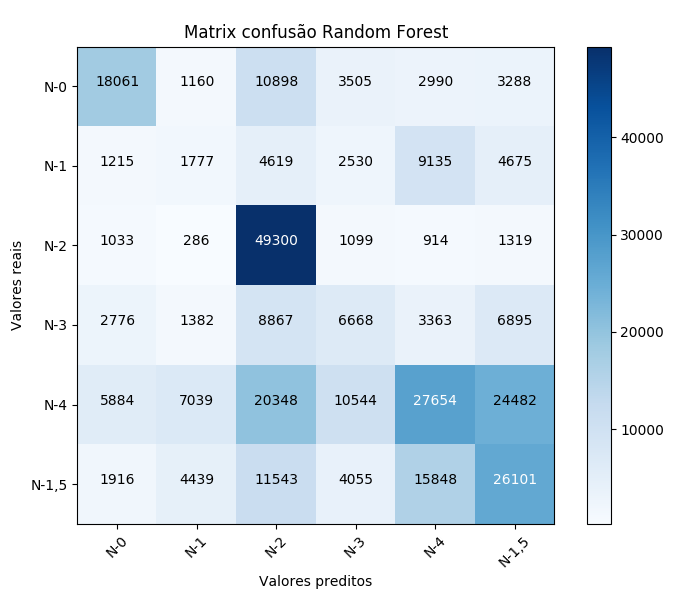

<IPython.core.display.Javascript object>


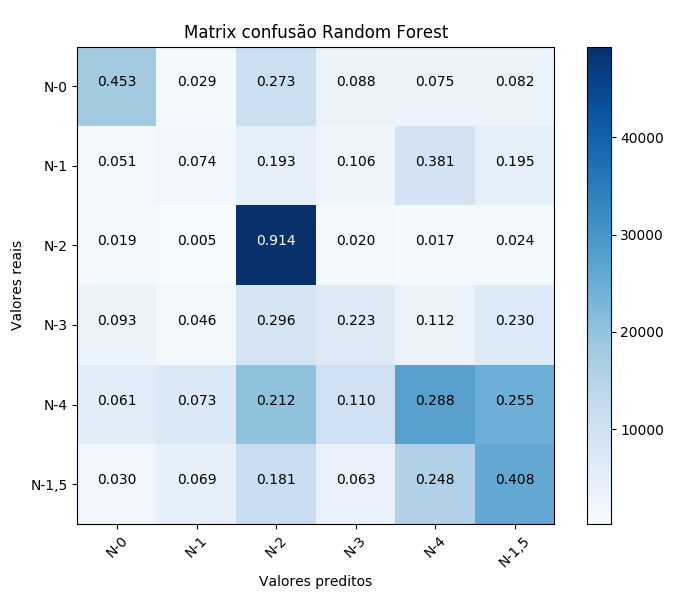

In [68]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão Random Forest')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão Random Forest')
fig_name = 'cm_RF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## Support Vector Machine RBF

In [121]:
from sklearn import svm, datasets

print 'Processing time SVM'
%time svm = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''
print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

In [123]:
accuracy_score(y_test, y_pred)

0.5417893235410155

In [124]:
print 'Predict time'  
%time y_pred = svm.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_validate, y_pred)*100))

In [126]:
(accuracy_score(y_validate, y_pred))

0.54334466328791231

# Confusion Matrix

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [129]:
confusion_matrix

array([[ 14447.,     22.,   2935.,    168.,    632.,    537.],
       [  1033.,   2526.,   2556.,    196.,   2509.,   3192.],
       [  4239.,    101.,  16525.,   1208.,   2675.,   2291.],
       [  3230.,    235.,   5187.,   2924.,    994.,   2534.],
       [  1098.,    600.,   3701.,    637.,  21684.,   3328.],
       [  2357.,    635.,   6465.,   1152.,   3742.,  13509.]])

In [130]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [131]:
TPR*100 # Sensitivity

array([ 77.09,  21.03,  61.12,  19.36,  69.84,  48.49])

In [132]:
TNR*100 # Specificity

array([ 89.42,  98.67,  80.1 ,  97.12,  89.53,  88.57])

In [133]:
PPV*100 # Precision

array([ 54.72,  61.33,  44.22,  46.52,  67.27,  53.2 ])

In [134]:
ACC*100 # Accuracy

array([ 87.67,  91.59,  76.21,  88.21,  84.89,  80.1 ])

In [135]:
sum(ACC)/6*100

84.778155442930412

<IPython.core.display.Javascript object>


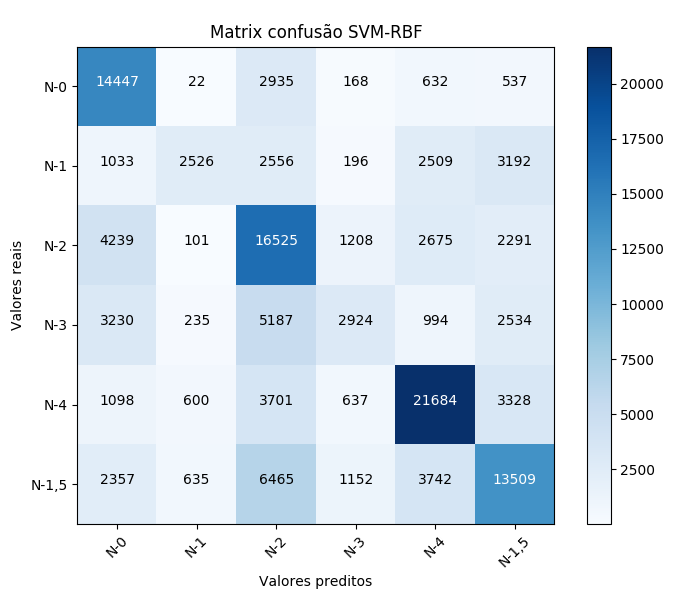

<IPython.core.display.Javascript object>


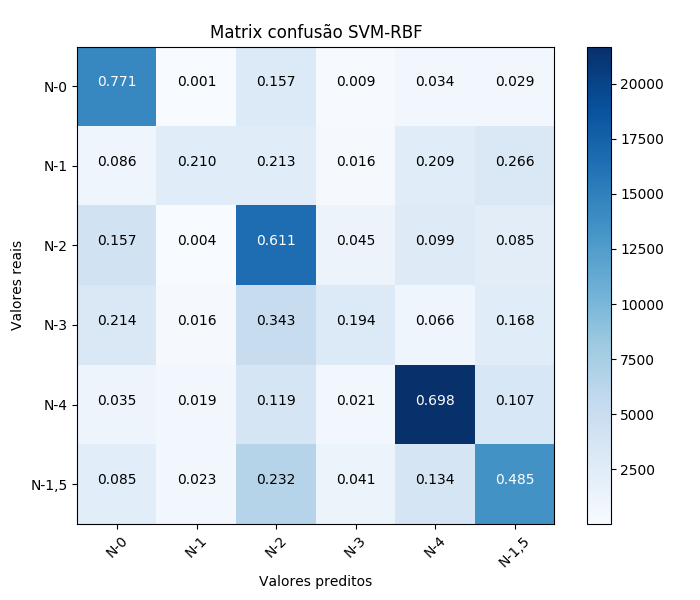

In [127]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

## Support Vector Machine Poly

In [136]:
from sklearn import svm, datasets

print 'Processing time Polynomial'
#%time svm = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)
%time svm = svm.SVC(kernel='poly', degree=3).fit(X_train_std, y_train)


In [137]:
y_pred = svm.predict(X_test_std)

print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, y_pred)*100))
        

In [138]:
accuracy_score(y_test, y_pred)

0.26889168765743071

In [139]:
print 'Predict time'  
%time y_pred = svm.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:---------->%.2f %%' % (accuracy_score(y_validate, y_pred)*100))

In [140]:
accuracy_score(y_validate, y_pred)

0.26927103881521047

# Confusion Matrix

In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [142]:
confusion_matrix

array([[  0.00e+00,   0.00e+00,   1.78e+04,   0.00e+00,   5.64e+02,
          4.19e+02],
       [  0.00e+00,   2.30e+02,   9.12e+03,   0.00e+00,   1.33e+03,
          1.33e+03],
       [  0.00e+00,   4.00e+00,   2.58e+04,   0.00e+00,   5.93e+02,
          6.58e+02],
       [  0.00e+00,   0.00e+00,   1.41e+04,   0.00e+00,   6.39e+02,
          3.40e+02],
       [  0.00e+00,   2.90e+01,   2.17e+04,   0.00e+00,   7.44e+03,
          1.83e+03],
       [  0.00e+00,   2.70e+01,   2.28e+04,   0.00e+00,   2.95e+03,
          2.04e+03]])

In [143]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [144]:
TPR*100 # Sensitivity

array([  0.  ,   1.91,  95.36,   0.  ,  23.95,   7.32])

In [145]:
TNR*100 # Specificity

array([ 100.  ,   99.95,   18.3 ,  100.  ,   93.97,   95.59])

In [146]:
PPV*100 # Precision

array([   nan,  79.31,  23.15,    nan,  55.03,  30.8 ])

In [147]:
ACC*100 # Accuracy

array([ 85.78,  91.02,  34.11,  88.54,  77.48,  76.93])

In [148]:
sum(ACC)/6*100

75.642367960507016

<IPython.core.display.Javascript object>


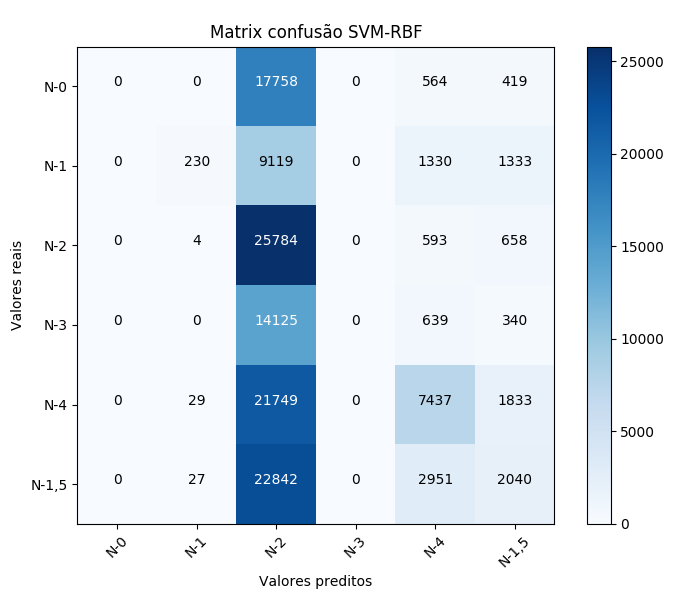

<IPython.core.display.Javascript object>


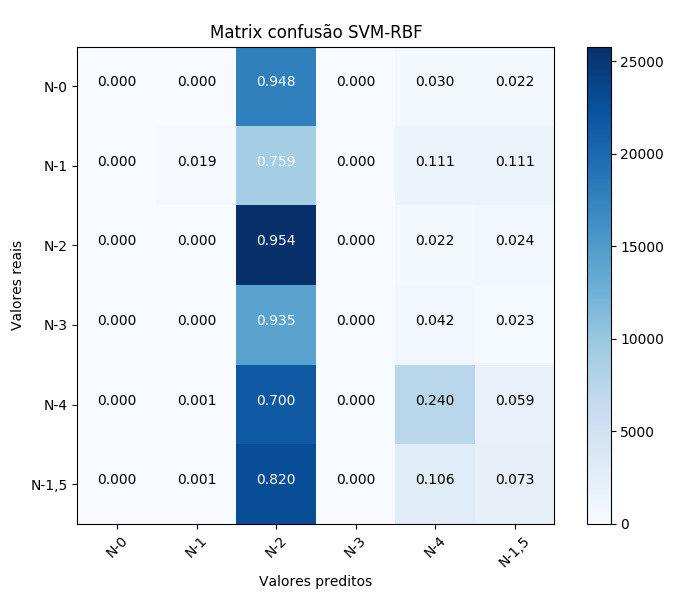

In [149]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()